# Technical challenge

You are given a dataset (assets/dataset.zip) containing information about restaurants all over
Europe. The goal of the challenge is to make sense of the dataset and understand it in such a
way that informed, data-based business decisions can be made. To make things easier, the
challenge is split into three conceptually independent parts, with action points at each part.

### Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

### Reading in the data

In [22]:
df = pd.read_csv('dataset.csv')

C:\Users\junai\AppData\Local\Temp\ipykernel_7044\112859877.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


# Data cleaning

## 1. Identify the columns with mixed data types.

### Code

In [23]:
def get_types(col):
    """returns the set of types in a column"""
    types = set()
    for val in df[col]:
        
        if pd.isna(val):
            types.add(np.nan)
        else:
            types.add(type(val))
        
    return types
        
    
column_count = 1
print('# Column Name:   Types')
for col in df.columns:
    types = get_types(col)
    if len(types)>1:
        print(f'{column_count} {col}: {types}')
        column_count += 1
        

# Column Name:   Types
1 region: {nan, <class 'str'>}
2 province: {nan, <class 'str'>}
3 city: {nan, <class 'str'>}
4 latitude: {nan, <class 'float'>}
5 longitude: {nan, <class 'float'>}
6 claimed: {nan, <class 'str'>}
7 awards: {nan, <class 'str'>}
8 popularity_detailed: {nan, <class 'str'>}
9 popularity_generic: {nan, <class 'str'>}
10 top_tags: {nan, <class 'str'>}
11 price_level: {nan, <class 'str'>}
12 price_range: {nan, <class 'str'>}
13 meals: {nan, <class 'str'>}
14 cuisines: {nan, <class 'str'>}
15 special_diets: {nan, <class 'str'>}
16 features: {nan, <class 'str'>}
17 original_open_hours: {nan, <class 'str'>}
18 open_days_per_week: {nan, <class 'float'>}
19 open_hours_per_week: {nan, <class 'float'>}
20 working_shifts_per_week: {nan, <class 'float'>}
21 avg_rating: {nan, <class 'float'>}
22 total_reviews_count: {nan, <class 'float'>}
23 default_language: {nan, <class 'str'>}
24 reviews_count_in_default_language: {nan, <class 'float'>}
25 excellent: {nan, <class 'float'>}
26 

### Answer
#### there are 34 columns with mixed data types, they are either nan and str or nan and float

### 2. For each column, count the number of rows per data type

In [24]:
def values_per_type(col):
    """takes column name as input and returns the dictionary with type as key and number of values and value"""
    value_counts = defaultdict(lambda : 0)
    for val in df[col]:
        if pd.isna(val):
            value_counts[np.nan] += 1
        else:
            value_counts[str(type(val))] += 1
        
    return value_counts
    
    
# showing results
column_count = 1
print('# Column Name:   Types: (count)')
for col in df.columns:
    value_counts = values_per_type(col)
    print(f'{column_count} {col}:   ', end='')
    for key, val in value_counts.items():
        print(f'{key} ({val})', end='')
        print('  ', end='')
        
    print()
    column_count += 1

# Column Name:   Types: count
1 restaurant_link:   <class 'str'> (1083397)  
2 restaurant_name:   <class 'str'> (1083397)  
3 original_location:   <class 'str'> (1083397)  
4 country:   <class 'str'> (1083397)  
5 region:   <class 'str'> (1033074)  nan (50323)  
6 province:   <class 'str'> (742765)  nan (340632)  
7 city:   <class 'str'> (682712)  nan (400685)  
8 address:   <class 'str'> (1083397)  
9 latitude:   <class 'float'> (1067607)  nan (15790)  
10 longitude:   <class 'float'> (1067607)  nan (15790)  
11 claimed:   <class 'str'> (1081555)  nan (1842)  
12 awards:   nan (820264)  <class 'str'> (263133)  
13 popularity_detailed:   <class 'str'> (988409)  nan (94988)  
14 popularity_generic:   <class 'str'> (985605)  nan (97792)  
15 top_tags:   <class 'str'> (972763)  nan (110634)  
16 price_level:   <class 'str'> (806192)  nan (277205)  
17 price_range:   nan (779070)  <class 'str'> (304327)  
18 meals:   <class 'str'> (635347)  nan (448050)  
19 cuisines:   <class 'str'> (9142

### 3. Would removing missing values solve the mixed data type problem?

### Code

In [25]:
df.dropna().to_csv('no_missing_values.csv')
no_missing_value = pd.read_csv('no_missing_values.csv')

In [29]:
print(f'Number of rows before deleting NaN values: {len(df)}')
print(f'Number of rows after deleting NaN values: {len(no_missing_value)}')

Number of rows before deleting NaN values: 1083397
Number of rows after deleting NaN values: 2177


### Answer
#### Yes, after calling dropna() method pandas does not throw mix data type warning, however it deletes 99% of the data

## Data understanding

### 1. Are the review columns correlated with the rating columns?

### Code

In [30]:
# column names for review and rating columns
review_and_rating_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language", 
"food", "service", "value", "atmosphere", "avg_rating"]

# setting missing values to 0 to all review and rating columns
default_value = {col:0 for col in review_and_rating_columns}
df.fillna(default_value, inplace=True)

### Creating a heatmap for correlation table

<AxesSubplot:>

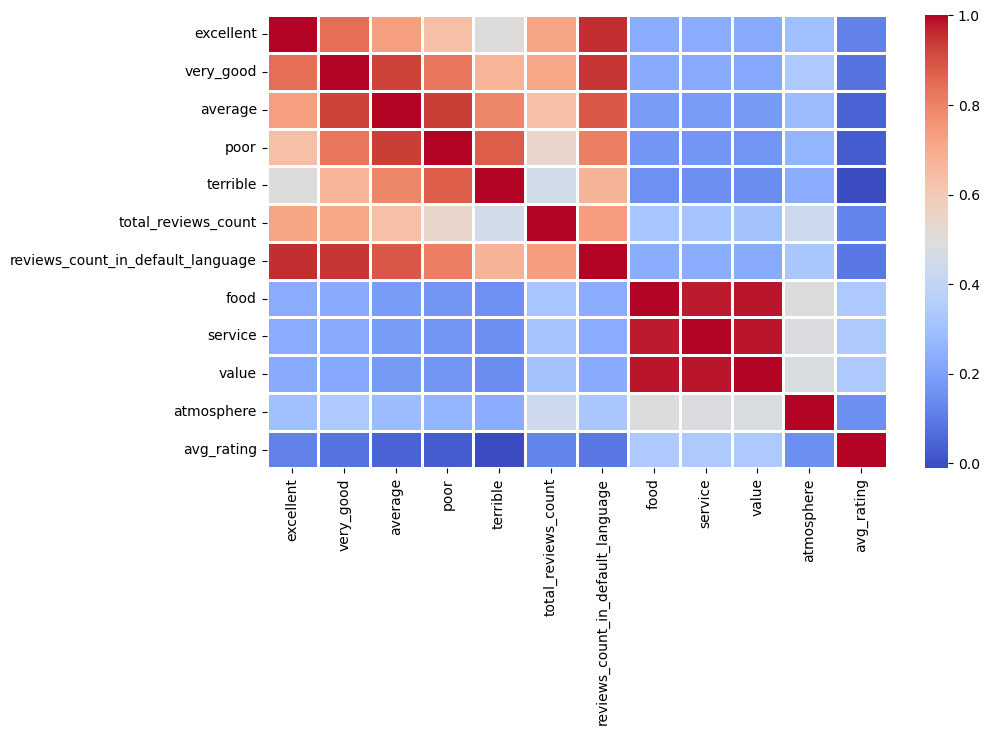

In [31]:
# creating correlation table for review and rating columns
correlation_table = df[review_and_rating_columns].corr()

# creating a heatmap for correlation table
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(correlation_table, cmap='coolwarm', linecolor='white', linewidths=2)

### Answer
#### From the looks of heatmap above, it doesn't look like that there is any correlation between review and rating columns

### 2. Are vegetarian-friendly restaurants better than non-vegetarian ones?

### Code

In [32]:
# calculating average rating for vagetarian friendly and non vegetarian restaurants
vegetarian_friendly_avg_rating = df[df['vegetarian_friendly']=='Y']['avg_rating'].mean()
non_vegetarian_friendly_avg_rating = df[df['vegetarian_friendly']=='N']['avg_rating'].mean()

print(f'vegetarian friendly restaurants average rating: {round(vegetarian_friendly_avg_rating, 2)}')
print(f'non-vegetarian friendly restaurants average rating: {round(non_vegetarian_friendly_avg_rating, 2)}')

vegetarian friendly restaurants average rating: 4.17
non-vegetarian friendly restaurants average rating: 3.47


### Answer
#### It looks like vegetarian friendly restaurants have better average ratings than non-vegatarian ones

## 3. Are there any significantly more expensive cuisines?

### Code

In [36]:
def parse_price(price_range):
    high_value = price_range.split('-')[1]
    if 'CHF' in high_value:
        high_value = high_value[4:]
    else:
        high_value = high_value[1:]
        
    return int(high_value.replace(',', ''))

# creating a dataframe for cuisines and price_range
cuisines_price_df = df[df['price_range'].notna()][['price_range', 'cuisines']]

# creating a max_price column
cuisines_price_df['max_price'] = cuisines_price_df['price_range'].apply(parse_price)

# displaying the cuisines_price dataframe by sorting the dataframe by max_price in descending order
cuisines_price_df.sort_values(by='max_price', ascending=False)[0:20]

,price_range,cuisines,max_price
664879,"€82,794,888-€745,153,984","Italian, Barbecue",745153984
399853,"€166,390,048-€665,560,192",Spanish,665560192
607006,"€7-€142,504,064",Italian,142504064
678891,"€12-€123,456,792",NaN,123456792
360797,"€30-€100,000,000","Seafood, Mediterranean, European, Spanish",100000000
652072,"€4,400,000-€100,000,000","Barbecue, European, Asian, Middle Eastern, Alb...",100000000
764037,"€60-€100,000,000","Italian, Mediterranean, Tuscan",100000000
477586,"€10-€100,000,000","Indian, Asian",100000000
789112,"€92,541,544-€92,541,544","Bar, Seafood, Mediterranean, Pub, Southern-Ita...",92541544
323722,"€2-€82,794,888",Mediterranean,82794888


### Answer
#### Above is a dataframe of cuisines sorted by max_price in descending order and it shows that the cuisines with highest price are: Italian, Barbecue, Spanish, Seafood, Mediterranean, European, Brew Pub, Bar, Dining bars, Chinese, Japanese, Sushi, Asian, Japanese Fusion		

## Business-specific

### A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?

### Code

In [37]:
# reading europe_capitals_population_and_area.csv file 
europe_capitals = pd.read_csv('europe_capitals_population_and_area.csv', sep=';', index_col='CityNo')
europe_capitals.head()

,City,Country,Population,Area in km2
CityNo,,,,
1,Amsterdam,Netherland,851573,"219,32"
2,Athens,Greece,664046,2929
4,Barcelona,Spain,1620809,"101,4"
4,Berlin,Germany,3711930,"891,7"
5,Bratislava,Slovakia,424428,"367,6"


In [38]:
# creating a dictionary to hold key for capital name and value for count of gluten_free restaurants
# initially all values are set to 0
gluten_free_count = {capital:0 for capital in europe_capitals['City'].unique()}

#  now iterating the dataframe and counting gluten_free restaurants for each capital
for i, row in df.iterrows():
    city_name = row['city']
    if city_name in df2['City'].unique() and row['gluten_free'] == 'Y':
        gluten_free_count[city_name] += 1

In [8]:
gluten_free_count

{'Amsterdam': 622,
 'Athens': 271,
 'Barcelona': 0,
 'Berlin': 0,
 'Bratislava': 67,
 'Brussels': 0,
 'Budapest': 433,
 'Copenhagen': 251,
 'Dublin': 596,
 'Edinburgh': 0,
 'Geneva': 0,
 'Hamburg': 0,
 'Helsinki': 199,
 'Krakow': 0,
 'Lisbon': 537,
 'Ljubljana': 0,
 'London': 0,
 'Luxembourg': 0,
 'Lyon': 54,
 'Madrid': 1368,
 'Milan': 1154,
 'Munich': 256,
 'Oporto': 0,
 'Oslo': 0,
 'Paris': 582,
 'Prague': 389,
 'Rome': 1654,
 'Stockholm': 366,
 'Vienna': 413,
 'Warsaw': 0,
 'Zurich': 0}

In [39]:
# adding a new column to hold count of gluten_free restaurants for each capital using gluten_free_count created above
europe_capitals['gluten_free_restaurants'] = europe_capitals['City'].apply(lambda x: gluten_free_count[x])

In [41]:
# parse area column: replace , with . and convert to float
europe_capitals['Area in km2 '] = europe_capitals['Area in km2 '].apply(lambda x: float(x.replace(',', '.')))

In [44]:
# displaying europe_capitals dataframe by sorting the by Area in descending order
europe_capitals.sort_values(['Area in km2 ', 'gluten_free_restaurants'], ascending=[False, True]).head(10)

,City,Country,Population,Area in km2,gluten_free_restaurants
CityNo,,,,,
2,Athens,Greece,664046,2929.0,271
18,Luxembourg,Luxembourg,590667,2586.4,0
27,Rome,Italy,2868782,1285.0,1654
4,Berlin,Germany,3711930,891.7,0
12,Hamburg,Germany,1822445,755.0,0
17,London,England,8825000,607.0,0
20,Madrid,Spain,3141991,604.3,1368
7,Budapest,Hungary,1779361,525.2,433
30,Warsaw,Poland,1764615,517.0,0


## Answer
## Luxembourg, Berlin, Hamburg, London, Warsaw have no gluten free restaurants
#### It shows that the following capitals have the largest area with no gluten free restaurant. So it is a good idea to open a gluten free restaurant in one of these cities

### 2. Think and propose a couple of other ways this dataset could be used to help businesses.

### Answer
1. use latitude and longitude columns to see the distribution of restaurants in Europe
2. find number of restaurants in each city and country
3. find what kind of meals are mostly served in restaurants
4. see price distribution and find the optimal price to keep 
5. see the most common opening hours of the restaurants